In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [2]:
df=pd.read_csv('laptopData - laptopData.csv')

In [3]:
df.shape

(1303, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [5]:
df.head(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
df.dtypes

Unnamed: 0          float64
Company              object
TypeName             object
Inches               object
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [7]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [8]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [9]:
df.dropna(inplace=True)

In [10]:
df.fillna(df.mean(numeric_only=True), inplace=True)
df.shape

(1273, 11)

In [11]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [12]:
df['Inches'] = pd.to_numeric(df['Inches'].astype(str).str.replace('"',''), errors='coerce')
df['Weight'] = pd.to_numeric(df['Weight'].astype(str).str.replace('kg','').str.replace('?',''), errors='coerce')
df['Ram'] = pd.to_numeric(df['Ram'].astype(str).str.replace('GB',''), errors='coerce')
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
dtype: object

In [13]:
'''1. What is the average laptop price by company?
2. How many laptops are there from each company?
3. What is the distribution of laptop types?
4. What is the most common operating system?
5. What is the average RAM per laptop type '''
#1
avg_laptopprice=df.groupby('Company')['Price'].mean().sort_values(ascending=False)
avg_laptopprice

Company
Razer        178282.491429
LG           111834.720000
MSI           91814.548891
Google        89386.080000
Microsoft     85903.788000
Apple         83340.499886
Huawei        75870.720000
Samsung       75308.320000
Toshiba       66747.370213
Dell          63237.061079
Xiaomi        60390.882000
Asus          58972.373723
Lenovo        58072.477208
HP            57214.371465
Fujitsu       38574.720000
Acer          33394.615969
Chuwi         16745.726400
Mediacom      15717.600000
Vero          11584.404000
Name: Price, dtype: float64

<Axes: xlabel='Company'>

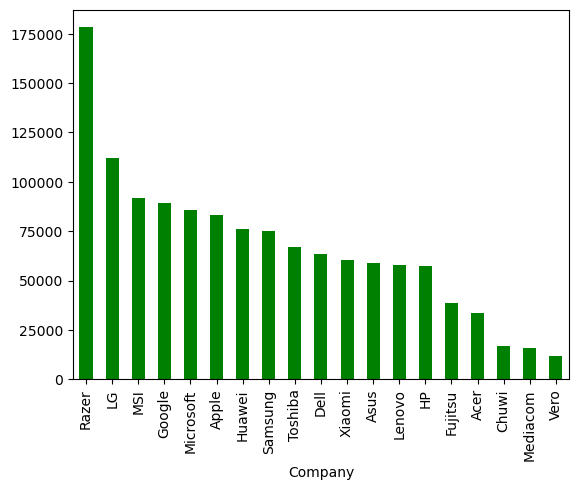

In [14]:
avg_laptopprice.plot(kind='bar',color='green')

In [15]:
#2
laptop_count_by_company = df['Company'].value_counts()
laptop_count_by_company

Company
Lenovo       290
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
LG             3
Google         3
Huawei         2
Fujitsu        2
Name: count, dtype: int64

<Axes: xlabel='Company'>

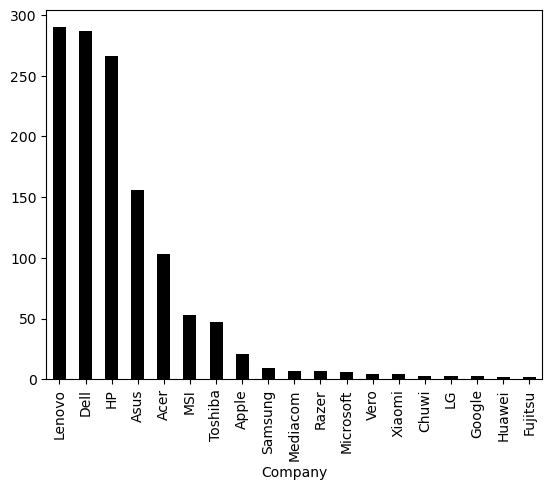

In [16]:
laptop_count_by_company.plot(kind='bar',color='black')

In [17]:
#3
laptop_type_distribution = df['TypeName'].value_counts()
laptop_type_distribution

TypeName
Notebook              710
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            29
Netbook                24
Name: count, dtype: int64

In [18]:
#4
most_common_os = df['OpSys'].value_counts().idxmax()
most_common_os

'Windows 10'

In [19]:
#5
average_ram_by_type = df.groupby('TypeName')['Ram'].mean()
average_ram_by_type

TypeName
2 in 1 Convertible     8.525862
Gaming                14.029557
Netbook                4.750000
Notebook               6.461972
Ultrabook             10.104712
Workstation           10.482759
Name: Ram, dtype: float64

<Axes: xlabel='TypeName', ylabel='Ram'>

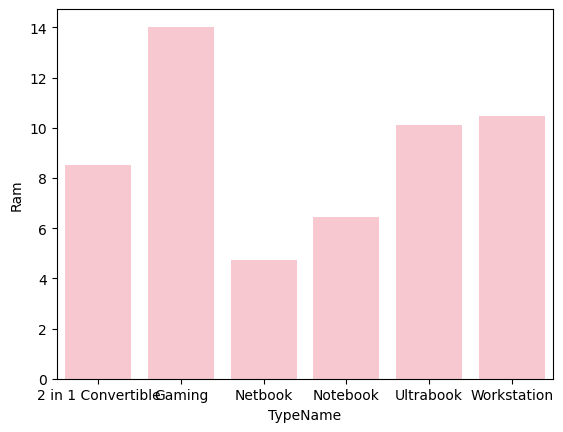

In [20]:
sns.barplot(average_ram_by_type,color='pink')

In [21]:
'''6.  Which laptop has the highest price?
7.  Which screen size is most common?
8.  How does price vary with screen size?
9.  How does weight affect laptop pricing?
10. Which companies make the lightest laptops on average?'''
#6
highest_price_laptop = df.loc[df['Price'].idxmax()]
highest_price_laptop

Company                                           Razer
TypeName                                         Gaming
Inches                                             17.3
ScreenResolution    4K Ultra HD / Touchscreen 3840x2160
Cpu                         Intel Core i7 7820HK 2.9GHz
Ram                                                  32
Memory                                          1TB SSD
Gpu                             Nvidia GeForce GTX 1080
OpSys                                        Windows 10
Weight                                             3.49
Price                                         324954.72
Name: 196, dtype: object

In [22]:
#7
most_common_screen_size = df['Inches'].value_counts().idxmax()
most_common_screen_size

np.float64(15.6)

<Axes: xlabel='Inches', ylabel='Price'>

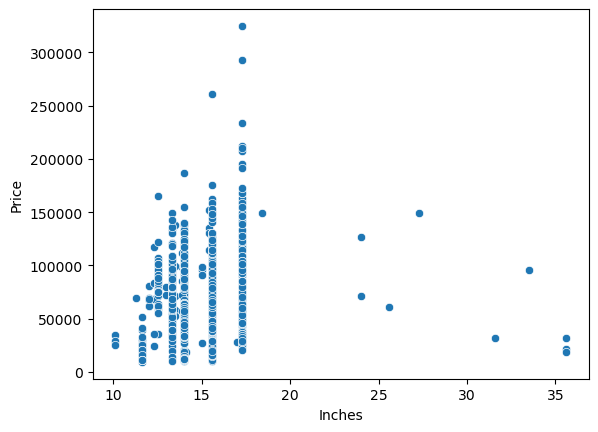

In [23]:
#8
sns.scatterplot(x='Inches', y='Price', data=df)

<Axes: xlabel='Weight', ylabel='Price'>

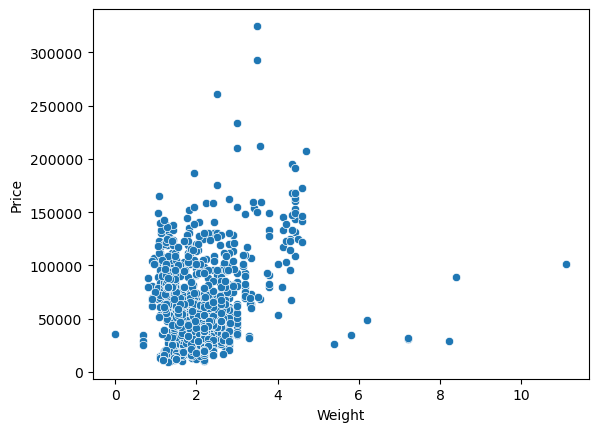

In [24]:
#9
sns.scatterplot(x='Weight', y='Price', data=df)

In [25]:
#10
average_weight_by_company = df.groupby('Company')['Weight'].mean().sort_values()
average_weight_by_company

Company
LG           1.050000
Huawei       1.050000
Google       1.100000
Microsoft    1.251333
Samsung      1.315556
Apple        1.320476
Vero         1.330000
Mediacom     1.337143
Xiaomi       1.620000
Toshiba      1.696383
Chuwi        1.726667
HP           1.916880
Lenovo       2.058862
Dell         2.164095
Razer        2.195714
Fujitsu      2.250000
Acer         2.273689
Asus         2.309686
MSI          2.656038
Name: Weight, dtype: float64

<Axes: ylabel='Company'>

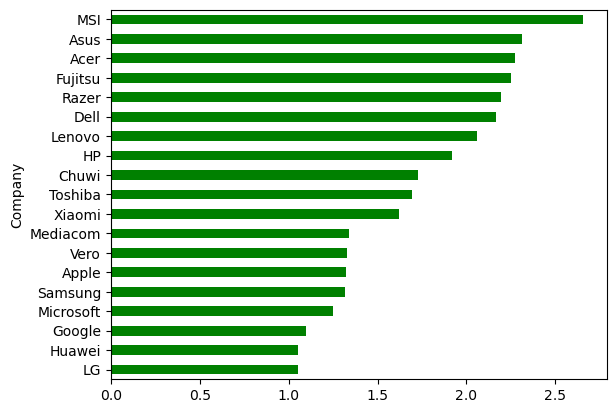

In [26]:
average_weight_by_company.plot(kind='barh',color='green')

In [27]:
'''11. How does the average laptop price differ by CPU brand (Intel vs AMD vs others)?
12. What is the most common GPU manufacturer?
13. What is the distribution of laptop weights?
14. How does price relate to RAM visually?
15. Whats the relationship between RAM and screen size?'''
#11
df['Cpu_Brand'] = df['Cpu'].apply(lambda x: x.split(' ')[0])
average_price_by_cpu_brand = df.groupby('Cpu_Brand')['Price'].mean().sort_values(ascending=False)
average_price_by_cpu_brand

Cpu_Brand
Intel      61517.890723
Samsung    35111.520000
AMD        29870.839045
Name: Price, dtype: float64

<Axes: xlabel='Cpu_Brand', ylabel='Price'>

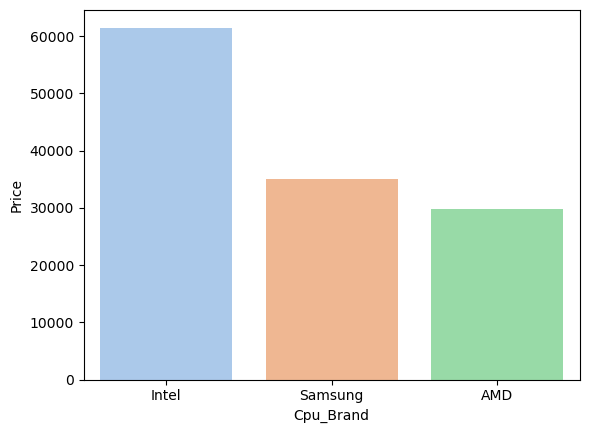

In [28]:
sns.barplot(average_price_by_cpu_brand,palette='pastel')

In [29]:
#12
df['Gpu_Brand'] = df['Gpu'].apply(lambda x: x.split(' ')[0])
most_common_gpu_manufacturer = df['Gpu_Brand'].value_counts().idxmax
most_common_gpu_manufacturer

<bound method Series.idxmax of Gpu_Brand
Intel     703
Nvidia    393
AMD       176
ARM         1
Name: count, dtype: int64>

<Axes: xlabel='Weight', ylabel='Count'>

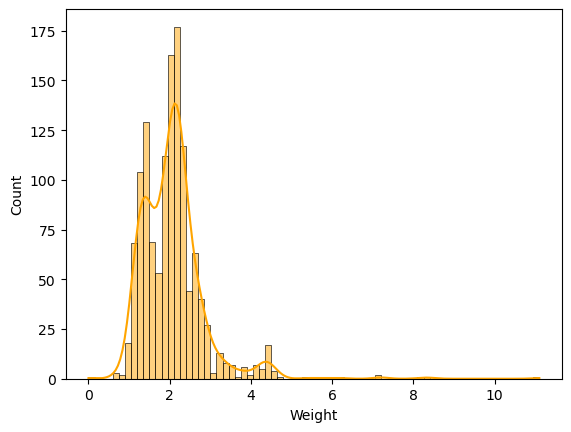

In [30]:
#13
sns.histplot(df['Weight'], kde=True,color='orange')

<Axes: xlabel='Ram', ylabel='Price'>

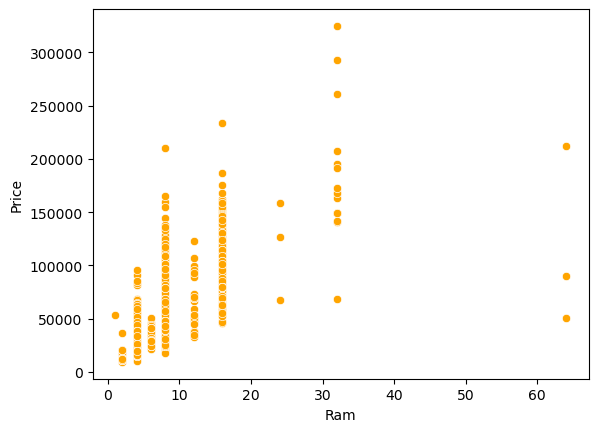

In [31]:
#14
sns.scatterplot(x='Ram', y='Price', data=df,color='orange')

<Axes: xlabel='Ram', ylabel='Inches'>

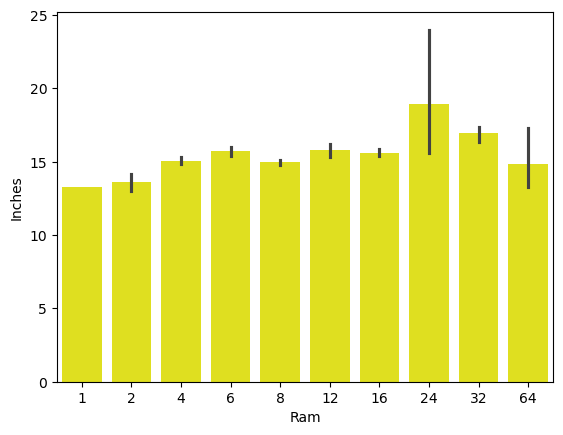

In [32]:
#15
sns.barplot(x='Ram', y='Inches', data=df,color='yellow')

In [33]:
'''16. How does laptop type affect weight?
17. Are heavier laptops more expensive?
18. Which company has the widest price range?
19. How does screen resolution vary by screen size?
We extract the resolution type from the ScreenResolution column, such as:
*  'HD' (lower than Full HD)
*  'FHD' (1920×1080)
* '4K' (3840×2160)
20. Which companies sell the most gaming laptops?'''
#16
average_weight_by_type = df.groupby('TypeName')['Weight'].mean().sort_values()
average_weight_by_type

TypeName
Netbook               1.319583
Ultrabook             1.418727
2 in 1 Convertible    1.578371
Notebook              2.095183
Workstation           2.466552
Gaming                2.952222
Name: Weight, dtype: float64

<Axes: xlabel='TypeName', ylabel='Weight'>

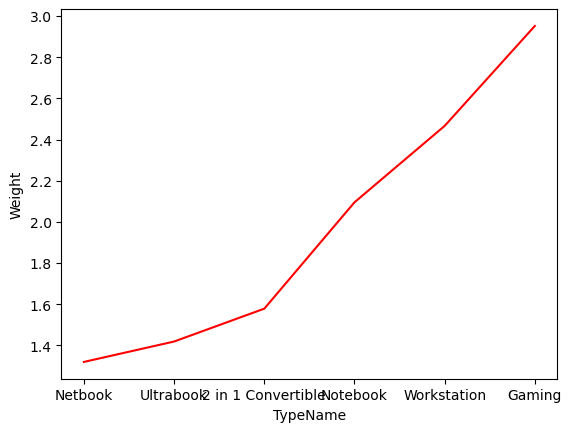

In [34]:
sns.lineplot(average_weight_by_type,color='red')

<Axes: xlabel='Weight', ylabel='Price'>

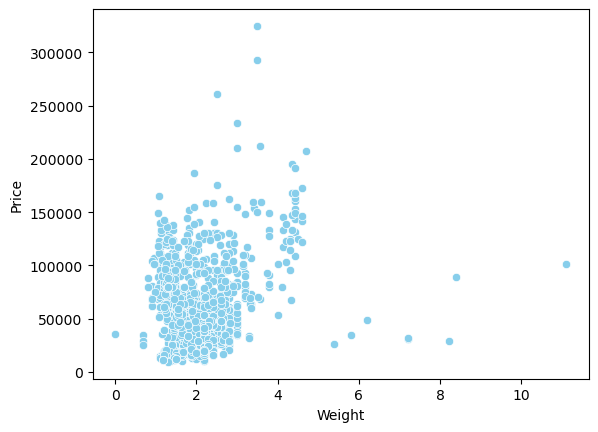

In [35]:
#17
sns.scatterplot(x='Weight', y='Price', data=df,color='skyblue')

In [36]:
#18
price_range_by_company = df.groupby('Company')['Price'].apply(lambda x: x.max() - x.min()).sort_values(ascending=False)
price_range_by_company

Company
Razer        270129.6000
Lenovo       248817.6000
HP           222710.4000
Asus         201185.2800
Dell         180326.1600
Acer         129204.0000
Toshiba      125314.5600
MSI          104428.8000
Apple        104378.7168
Microsoft     85248.0000
Samsung       84182.4000
Google        49230.7200
Xiaomi        24772.5360
LG            21312.0000
Chuwi         10869.6528
Huawei         7992.0000
Fujitsu        7992.0000
Mediacom       7992.0000
Vero           3409.9200
Name: Price, dtype: float64

<Axes: ylabel='Company'>

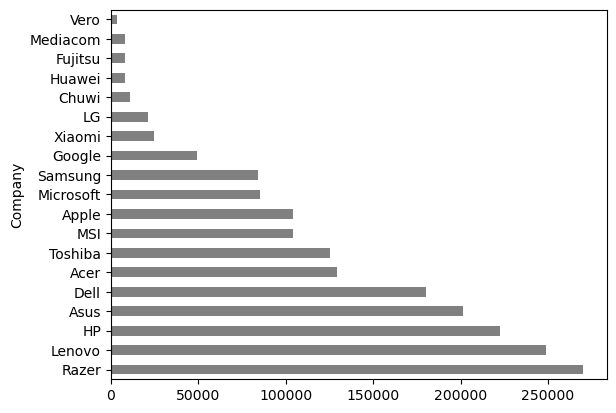

In [37]:
price_range_by_company.plot(kind='barh',color='gray')

In [38]:
#19
def get_resolution_type(resolution):
    if '3840x2160' in resolution:
        return '4K'
    elif '1920x1080' in resolution:
        return 'FHD'
    else:
        return 'HD'
df['Resolution_Type'] = df['ScreenResolution'].apply(get_resolution_type)

<Axes: xlabel='Inches', ylabel='count'>

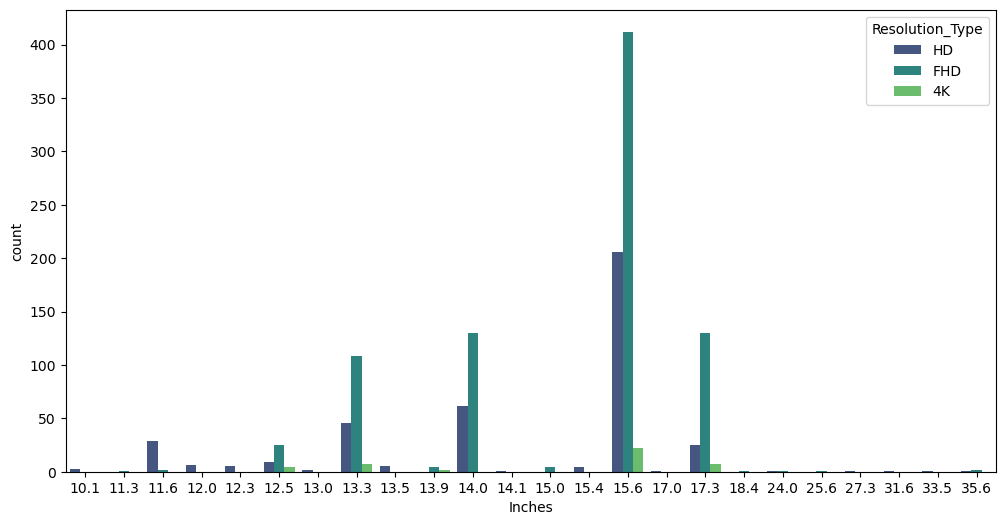

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Inches', hue='Resolution_Type', palette='viridis')

In [40]:
#20
gaming_laptops = df[df['TypeName'] == 'Gaming']
gaming_laptop_count_by_company = gaming_laptops['Company'].value_counts()
gaming_laptop_count_by_company

Company
Asus      53
MSI       53
Dell      40
Lenovo    32
HP        12
Acer       8
Razer      5
Name: count, dtype: int64

In [41]:
'''21. What’s the average price per company on the basis of RAM size?
22. What is the correlation matrix among numerical features?
23. Which screen resolution types are associated with the highest average prices?
Classify the screen resolutions into categories (like HD, Full HD, 4K) and find out which category tends to be more expensive.
24. What is the average price by CPU brand and OS type?
25. How many laptops per screen size range (binned)?
Objective:
To analyze the distribution of laptops by screen size, we have to divide screen sizes into bins (ranges). This helps us categorize continuous numeric values (like inches) into meaningful groups (e.g., Small, Medium, Large) for easier visualization and interpretation.
* Small (10"–13")
* Medium (13"–15")
* Large (15"–17")
Extra Large (17"–20")'''
#21
average_price_by_company_and_ram = df.groupby(['Company', 'Ram'])['Price'].mean()
average_price_by_company_and_ram

Company  Ram
Acer     1       53226.720000
         2       18541.440000
         4       23971.242189
         6       25521.120000
         8       42264.806865
                    ...      
Toshiba  32     149130.720000
Vero     2       11231.424000
         4       11702.064000
Xiaomi   8       55658.064000
         16      74589.336000
Name: Price, Length: 73, dtype: float64

<Axes: xlabel='Price', ylabel='Count'>

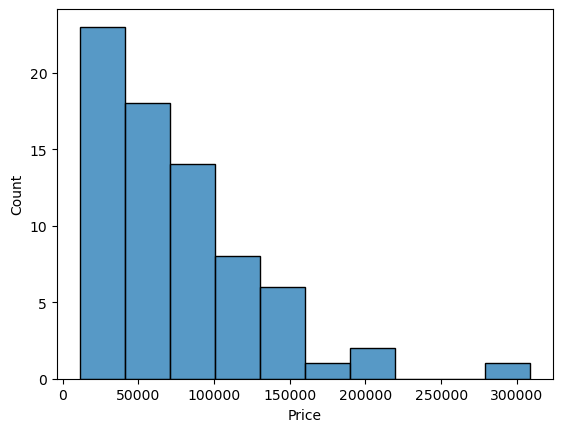

In [42]:
sns.histplot(average_price_by_company_and_ram)

In [43]:
#22
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()
correlation_matrix

,Inches,Ram,Weight,Price
Inches,1.000000,0.142137,0.494972,0.044681
Ram,0.142137,1.000000,0.283302,0.685648
Weight,0.494972,0.283302,1.000000,0.175928
Price,0.044681,0.685648,0.175928,1.000000


<Axes: >

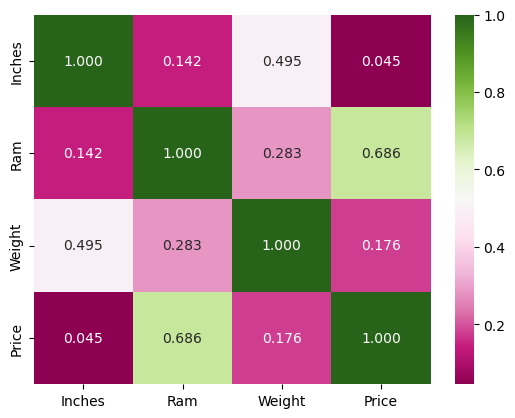

In [44]:
sns.heatmap(correlation_matrix,annot=True,fmt='.3f',cmap='PiYG')

In [45]:
#23
average_price_by_resolution_type = df.groupby('Resolution_Type')['Price'].mean().sort_values(ascending=False)
average_price_by_resolution_type

Resolution_Type
4K     129695.495314
FHD     65316.014873
HD      42021.457913
Name: Price, dtype: float64

<Axes: xlabel='Resolution_Type', ylabel='Price'>

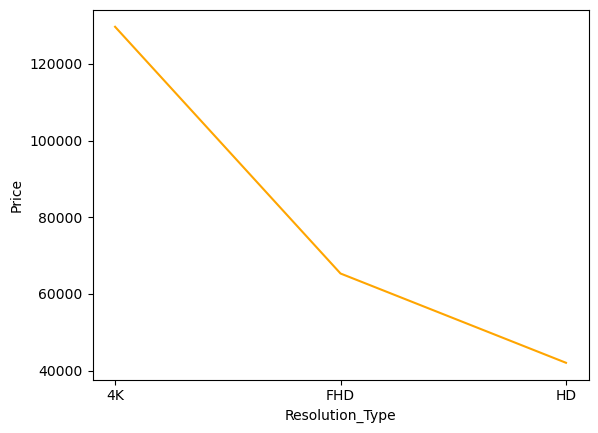

In [46]:
sns.lineplot(average_price_by_resolution_type,color='orange')

In [47]:
#24
average_price_by_cpu_os = df.groupby(['Cpu_Brand', 'OpSys'])['Price'].mean()
average_price_by_cpu_os

Cpu_Brand  OpSys       
AMD        No OS           15104.880000
           Windows 10      30626.626332
           Windows 10 S    14811.307200
Intel      Android         29250.720000
           Chrome OS       29278.999385
           Linux           32919.414846
           Mac OS X        67285.780200
           No OS           32443.362413
           Windows 10      64100.617404
           Windows 10 S    76219.704000
           Windows 7       89864.783040
           macOS           93220.327385
Samsung    Chrome OS       35111.520000
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Count'>

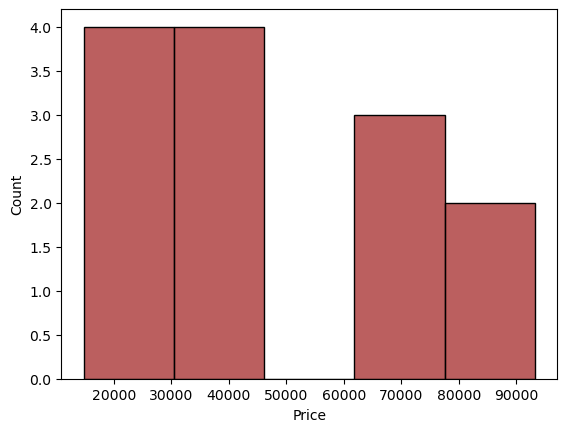

In [48]:
sns.histplot(average_price_by_cpu_os,color='brown')

In [49]:
#25
bins = [10, 13, 15, 17, 20]
labels = ['Small (10"-13")', 'Medium (13"-15")', 'Large (15"-17")', 'Extra Large (17"-20")']
df['Screen_Size_Bin'] = pd.cut(df['Inches'], bins=bins, labels=labels, right=False)
laptop_count_by_screen_size_bin = df['Screen_Size_Bin'].value_counts().sort_index()
laptop_count_by_screen_size_bin

Screen_Size_Bin
Small (10"-13")           84
Medium (13"-15")         367
Large (15"-17")          648
Extra Large (17"-20")    164
Name: count, dtype: int64

In [50]:
'''26. How does weight differ across screen size bins?
27. Which laptop types are most common within each company?
28. How many laptops are touchscreen vs non-touch?
29. What’s the price distribution for touch vs non-touch laptops?
30. Which GPU brand tends to offer the highest priced laptops?'''
#26
average_weight_by_screen_size_bin = df.groupby('Screen_Size_Bin')['Weight'].mean()
average_weight_by_screen_size_bin

Screen_Size_Bin
Small (10"-13")          1.235595
Medium (13"-15")         1.515022
Large (15"-17")          2.221006
Extra Large (17"-20")    3.196646
Name: Weight, dtype: float64

<Axes: xlabel='Screen_Size_Bin', ylabel='Weight'>

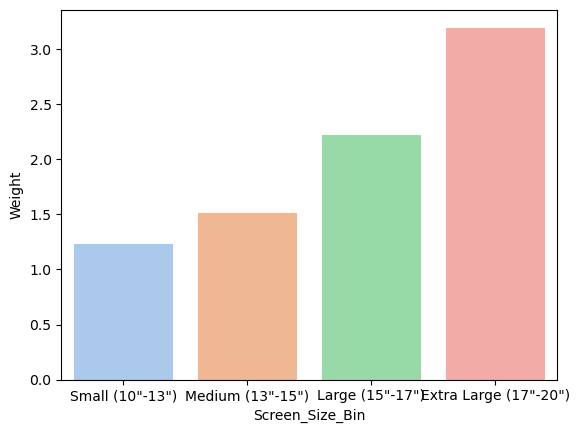

In [51]:
sns.barplot(average_weight_by_screen_size_bin,palette='pastel')

In [52]:
#27
most_common_type_by_company = df.groupby('Company')['TypeName'].agg(lambda x: x.value_counts().index[0])
most_common_type_by_company

Company
Acer          Notebook
Apple        Ultrabook
Asus          Notebook
Chuwi         Notebook
Dell          Notebook
Fujitsu       Notebook
Google       Ultrabook
HP            Notebook
Huawei       Ultrabook
LG           Ultrabook
Lenovo        Notebook
MSI             Gaming
Mediacom      Notebook
Microsoft    Ultrabook
Razer           Gaming
Samsung      Ultrabook
Toshiba       Notebook
Vero          Notebook
Xiaomi        Notebook
Name: TypeName, dtype: object

In [53]:
#28
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 'Touchscreen' if 'Touchscreen' in x else 'Non-Touchscreen')
touchscreen_counts = df['Touchscreen'].value_counts()
touchscreen_counts

Touchscreen
Non-Touchscreen    1088
Touchscreen         185
Name: count, dtype: int64

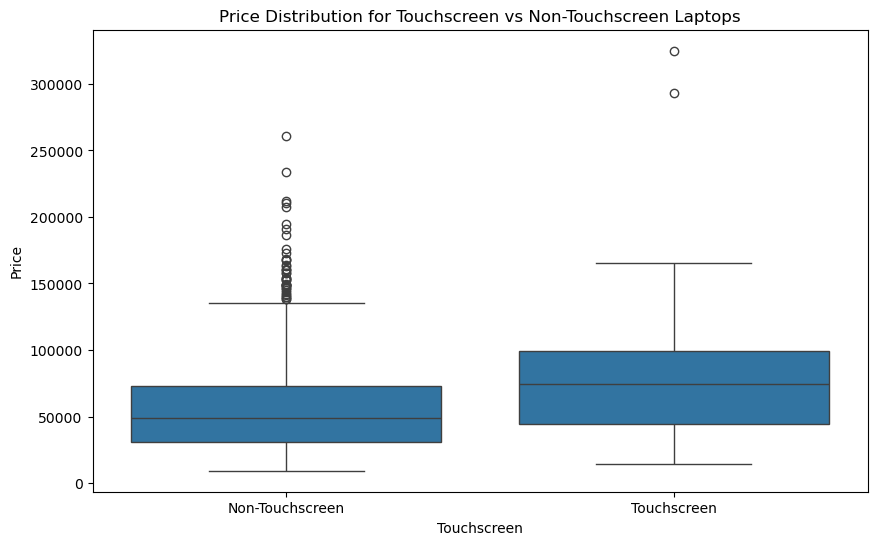

In [54]:
#29
plt.figure(figsize=(10, 6))
sns.boxplot(x='Touchscreen', y='Price', data=df)
plt.title('Price Distribution for Touchscreen vs Non-Touchscreen Laptops')
plt.xlabel('Touchscreen')
plt.ylabel('Price')
plt.show()

In [55]:
#30
average_price_by_gpu_brand = df.groupby('Gpu_Brand')['Price'].mean().sort_values(ascending=False)
average_price_by_gpu_brand

Gpu_Brand
Nvidia    79248.953991
Intel     53835.459537
AMD       41462.913764
ARM       35111.520000
Name: Price, dtype: float64

<Axes: xlabel='Gpu_Brand', ylabel='Price'>

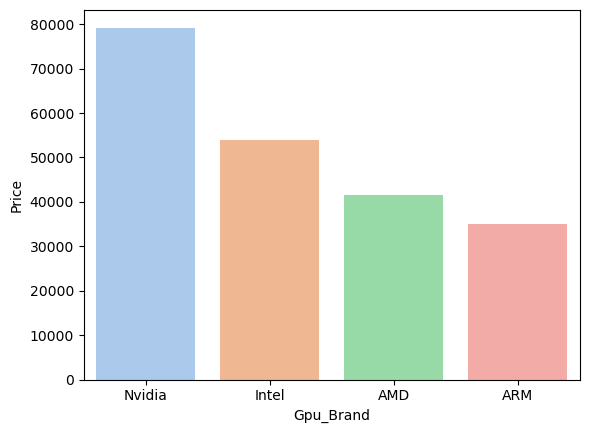

In [56]:
sns.barplot(average_price_by_gpu_brand,palette='pastel')